In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import operator

In [2]:
data = pd.read_csv("datos.csv")
X = data[['x']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

Regresión lineal con OLS:
MSE: 296.0945867766399
R^2: 0.7198048208163852


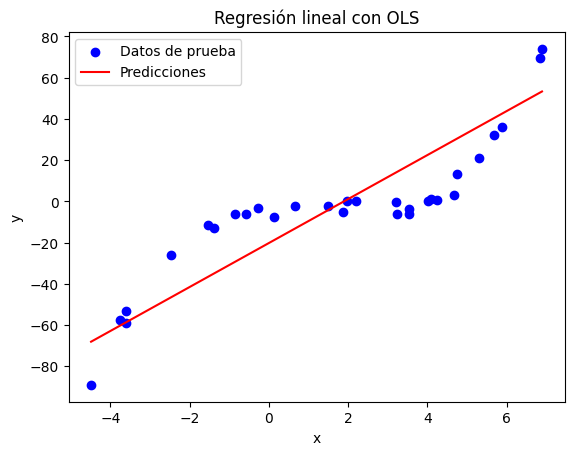


Regresión polinomial de grado 2 con OLS:
MSE: 352.4373840101113
R^2: 0.6664874659184128


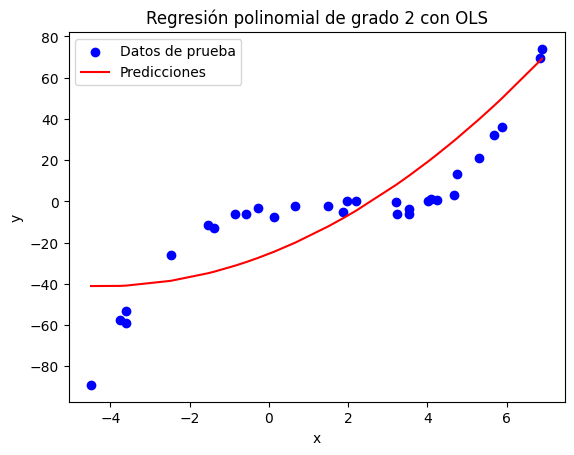


Regresión polinomial de grado 3 con OLS:
MSE: 8.487854131822615
R^2: 0.9919679186464004


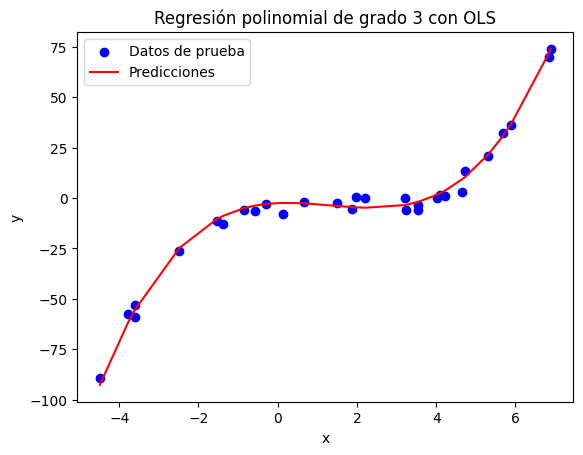

c:\Users\ianjo\miniconda2\envs\py311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



Regresión lineal con SGD:
MSE: 554.9631368548045
R^2: 0.47483674975580237


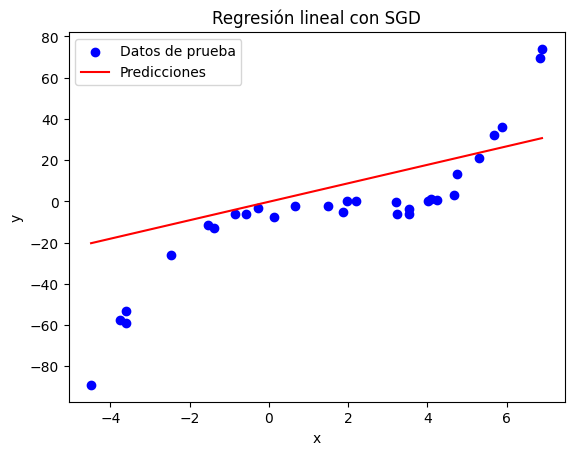

c:\Users\ianjo\miniconda2\envs\py311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



Regresión polinomial de grado 2 con SGD:
MSE: 872.4671275353303
R^2: 0.17438178862761278


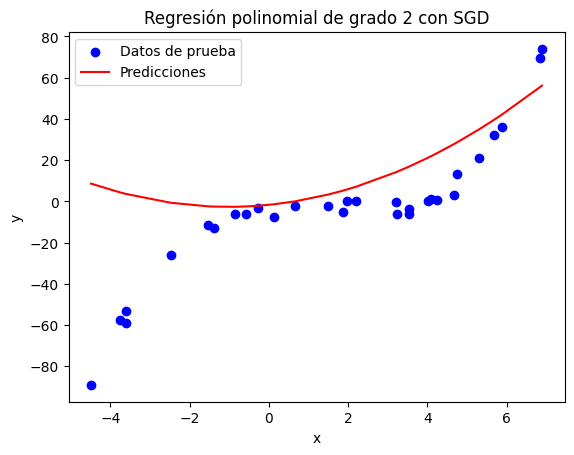


Regresión polinomial de grado 3 con SGD:
MSE: 15.73766285193295
R^2: 0.9851074033107702


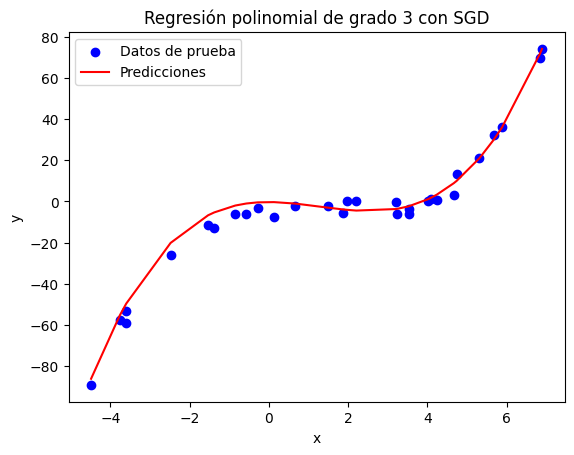

In [3]:
def plot_regression_results(X_test, y_test, y_pred, title):
    plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
    sorted_indices = np.argsort(X_test.values.flatten())
    plt.plot(X_test.values[sorted_indices], y_pred[sorted_indices], color='red', label='Predicciones')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def plot_regression_results(X_test, y_test, y_pred, title):
    plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
    sorted_indices = np.argsort(X_test.values.flatten())
    plt.plot(X_test.values[sorted_indices], y_pred[sorted_indices], color='red', label='Predicciones')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Rl con OLS
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Regresión lineal con OLS:")
print("MSE:", mse_linear)
print("R^2:", r2_linear)
plot_regression_results(X_test, y_test, y_pred_linear, "Regresión lineal con OLS")

# R polinomial grado 2 con OLS
poly_features_2 = PolynomialFeatures(degree=2)
X_train_poly_2 = poly_features_2.fit_transform(X_train)
X_test_poly_2 = poly_features_2.transform(X_test)
poly_reg_2 = LinearRegression()
poly_reg_2.fit(X_train_poly_2, y_train)
y_pred_poly_2 = poly_reg_2.predict(X_test_poly_2)
mse_poly_2 = mean_squared_error(y_test, y_pred_poly_2)
r2_poly_2 = r2_score(y_test, y_pred_poly_2)
print("\nRegresión polinomial de grado 2 con OLS:")
print("MSE:", mse_poly_2)
print("R^2:", r2_poly_2)
plot_regression_results(X_test, y_test, y_pred_poly_2, "Regresión polinomial de grado 2 con OLS")

# R polinomial grado 3 con OLS
poly_features_3 = PolynomialFeatures(degree=3)
X_train_poly_3 = poly_features_3.fit_transform(X_train)
X_test_poly_3 = poly_features_3.transform(X_test)
poly_reg_3 = LinearRegression()
poly_reg_3.fit(X_train_poly_3, y_train)
y_pred_poly_3 = poly_reg_3.predict(X_test_poly_3)
mse_poly_3 = mean_squared_error(y_test, y_pred_poly_3)
r2_poly_3 = r2_score(y_test, y_pred_poly_3)
print("\nRegresión polinomial de grado 3 con OLS:")
print("MSE:", mse_poly_3)
print("R^2:", r2_poly_3)
plot_regression_results(X_test, y_test, y_pred_poly_3, "Regresión polinomial de grado 3 con OLS")

# Rl con SGD
sgd_reg = SGDRegressor(learning_rate='constant', eta0=0.0000001, max_iter=10000, tol=1e-3, random_state=0)
sgd_reg.fit(X_train, y_train)
y_pred_sgd_linear = sgd_reg.predict(X_test)
mse_sgd_linear = mean_squared_error(y_test, y_pred_sgd_linear)
r2_sgd_linear = r2_score(y_test, y_pred_sgd_linear)
print("\nRegresión lineal con SGD:")
print("MSE:", mse_sgd_linear)
print("R^2:", r2_sgd_linear)
plot_regression_results(X_test, y_test, y_pred_sgd_linear, "Regresión lineal con SGD")

# R polinomial grado 2 con SGD
sgd_reg_poly_2 = SGDRegressor(learning_rate='constant', eta0=0.0000001, max_iter=10000, tol=1e-3, random_state=0)
X_train_poly_2_sgd = poly_features_2.fit_transform(X_train)
X_test_poly_2_sgd = poly_features_2.transform(X_test)
sgd_reg_poly_2.fit(X_train_poly_2_sgd, y_train)
y_pred_sgd_poly_2 = sgd_reg_poly_2.predict(X_test_poly_2_sgd)
mse_sgd_poly_2 = mean_squared_error(y_test, y_pred_sgd_poly_2)
r2_sgd_poly_2 = r2_score(y_test, y_pred_sgd_poly_2)
print("\nRegresión polinomial de grado 2 con SGD:")
print("MSE:", mse_sgd_poly_2)
print("R^2:", r2_sgd_poly_2)
plot_regression_results(X_test, y_test, y_pred_sgd_poly_2, "Regresión polinomial de grado 2 con SGD")

# R polinomial grado 3 con SGD
sgd_reg_poly_3 = SGDRegressor(learning_rate='constant', eta0=0.0000001, max_iter=10000, tol=1e-3, random_state=0)
X_train_poly_3_sgd = poly_features_3.fit_transform(X_train)
X_test_poly_3_sgd = poly_features_3.transform(X_test)
sgd_reg_poly_3.fit(X_train_poly_3_sgd, y_train)
y_pred_sgd_poly_3 = sgd_reg_poly_3.predict(X_test_poly_3_sgd)
mse_sgd_poly_3 = mean_squared_error(y_test, y_pred_sgd_poly_3)
r2_sgd_poly_3 = r2_score(y_test, y_pred_sgd_poly_3)
print("\nRegresión polinomial de grado 3 con SGD:")
print("MSE:", mse_sgd_poly_3)
print("R^2:", r2_sgd_poly_3)
plot_regression_results(X_test, y_test, y_pred_sgd_poly_3, "Regresión polinomial de grado 3 con SGD")

In [4]:
print("Regresión lineal con OLS:")
print("MSE:", mse_linear)
print("R^2:", r2_linear)

print("\nRegresión polinomial de grado 2 con OLS:")
print("MSE:", mse_poly_2)
print("R^2:", r2_poly_2)

print("\nRegresión polinomial de grado 3 con OLS:")
print("MSE:", mse_poly_3)
print("R^2:", r2_poly_3)

print("\nRegresión lineal con SGD:")
print("MSE:", mse_sgd_linear)
print("R^2:", r2_sgd_linear)

print("\nRegresión polinomial de grado 2 con SGD:")
print("MSE:", mse_sgd_poly_2)
print("R^2:", r2_sgd_poly_2)

print("\nRegresión polinomial de grado 3 con SGD:")
print("MSE:", mse_sgd_poly_3)
print("R^2:", r2_sgd_poly_3)

Regresión lineal con OLS:
MSE: 296.0945867766399
R^2: 0.7198048208163852

Regresión polinomial de grado 2 con OLS:
MSE: 352.4373840101113
R^2: 0.6664874659184128

Regresión polinomial de grado 3 con OLS:
MSE: 8.487854131822615
R^2: 0.9919679186464004

Regresión lineal con SGD:
MSE: 554.9631368548045
R^2: 0.47483674975580237

Regresión polinomial de grado 2 con SGD:
MSE: 872.4671275353303
R^2: 0.17438178862761278

Regresión polinomial de grado 3 con SGD:
MSE: 15.73766285193295
R^2: 0.9851074033107702
